error: 0.9162191677738876
error: 0.9320149763127281
error: 0.8789095837028418
error: 0.9216028512224103
error: 0.8962134834446789
error: 0.8819495372205404
error: 0.9125893737268163
error: 0.9022468109675206
error: 0.8638760874178236
error: 0.8413123752884283
error: 0.8883788975151168
error: 0.7793290470746314
error: 0.863649876347118
error: 0.788488370717732
error: 0.691914486276734
error: 0.701760979312162
error: 0.5800607529981474
error: 0.503310191534389
error: 0.4266639881601506
error: 0.5438267841988852
error: 0.3517363833667778
error: 0.2935043651508221
error: 0.5310395264473406
error: 0.8994919159300578
error: 0.523339244629173
error: 0.8149849390402343
error: 0.24450186436038412
wrong prediction: 18
right prediction: 9
accuracy: 0.3333333333333333


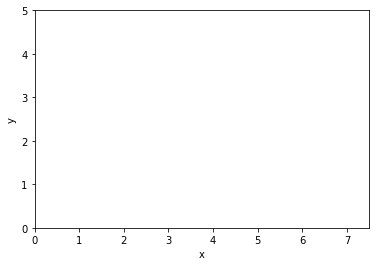

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import random
import math




def sig(x): #activation function: sigmoid
    return 1 /(1+(math.e**-x))
def mse(tar,out): #error check (means squared error)
    return ((tar-out)**2)/2
def grad(o,t,h): #gradient descent from output
    return (o-t)*o*(1-o)*h
dataset = "./datasets/iris.csv"
df = pd.read_csv(dataset, header=None)
results = df.values.tolist()
#print(results)
#print('after shuffle:')
np.random.shuffle(results)
#print(results)
# with open(dataset) as csvfile:
#     reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
#     for row in reader: # each row is a list
#         print(row)
#         if(row == "Iris-setosa"):
#             results.append(0)
#         elif(row == "Iris-versicolor"):
#             results.append(1)
#         elif(row == "Iris-virginica"):
#             results.append(2)
#         else:
#        results.append(row)
#print(results[0][:4])
#desc: 4 input node, 3 output node, 5 hidden layer's node, 1 hidden layer, 20 first weights and 15 second weights
#1st output: Iris-setosa, 2nd output: Iris-versicolor, 3rd output: Iris-virginica

#initializations
a = 0.5 #learning rate
bh = 0.35 #bias for hidden layer
bo = 0.6 #bias for output layer
w1 = np.random.rand(5,4) #weights for input - hidden layer
w2 = np.random.rand(3,5) #weights for hidden layer - output
#w1 = w1[0]
#w2 = w2[0]
#print(w1)
#print(w2)

di = [5.1,3.5,1.4,0.2] #test data, will be changed with csv
do = [1,0,0] #expected output, will be changed with csv

#testd1.append(1)
#w1.append(bh)
neth = [0.0,0.0,0.0,0.0,0.0]
h = [0.0,0.0,0.0,0.0,0.0]
neto = [0.0,0.0,0.0]
o = [0.0,0.0,0.0]
etot = 10
c = 0
counter = 0
salah = 0

#PLOTTING
x = np.linspace(0,10,1000)
fig,ax = plt.subplots(1,1)
ax.set_xlim(0,7.5)
ax.set_ylim(0,5)
#ax.scatter(df['x'], df['y'],c=['r'],label='Balls')
#ax.plot(x, f(x),label='Best fitting line')
plt.xlabel('x')
plt.ylabel('y')

#forward pass
#while etot>0.01 and c<150:
while etot>0.25:#c<150:#ini ntar disesuaikan lagi, masih rada brutu forcu lul,
    counter +=1
    if(c>=150):
        c=0
        np.random.shuffle(results)
    di=results[c][:4]
    if(results[c][4] == "Iris-setosa"):
        do = [1,0,0]
    elif(results[c][4] == "Iris-versicolor"):
        do = [0,1,0]
    elif(results[c][4] == "Iris-virginica"):
        do = [0,0,1]
    c+=1
    #-hidden layer
    for i,j in enumerate(neth):
        neth[i] = np.dot(di,w1[i])+bh
        h[i] = sig(neth[i])
    #-output layer
    for i,j in enumerate(neto):
        neto[i] = np.dot(h,w2[i])+bo
        o[i] = sig(neto[i])

    #error check
    #print('expected output: '+str(do))
    #print('trainning output: '+str(o))
    if(np.array(do).argmax()!=np.array(o).argmax()):
        #print('salah gan')
        salah+=1
    etot = 0 #mse(testd1o[0],o[0])+mse(testd1o[1],o[1])+mse(testd1o[2],o[2])
    for i,k in enumerate(o):
        etot += mse(do[i],o[i])
    
    
    #plot error
    for line in ax.lines:
        line.set_xdata(counter)
        line.set_ydata(etot)
    fig.canvas.draw()
    print('error: '+str(etot))

    #backward pass
    #-output layer
    w2t = w2

    for i,k in enumerate(w2): #for the output
        for j,l in enumerate(w2[i]): #for the weight
            w2[i][j] = w2t[i][j]-(a*grad(o[i],do[i],h[j]))
            #print('w['+str(i)+']['+str(j)+']: '+str(w2[i][j]))

    #-hidden layer
    #w[0][0] = w[0][0]-(((o[0]-t[0])*o[0]*(1-o[0])*w2t[0][0])+((o[1]-t[1])*o[1]*(1-o[1])*w2t[0][1])+...)*h[0]*(1-h[0])*i[0]*a
    #angka dari belakang, i=loop dalem,h=loop luar,h=loop luar,(sigma di bawah), w=luar, dalem
    #dalem sigma, bagian w2t[0][0], index pertama berdasar luar
    for i,k in enumerate(w1): #for the hidden
        for j,l in enumerate(w1[i]):
            eouth = 0
            for n,m in enumerate(o):
                eouth += grad(o[n],do[n],w2t[n][j])
            w1[i][j] = w1[i][j]-(eouth*h[i]*(1-h[i])*di[j]*a)
            #print('w['+str(i)+']['+str(j)+']: '+str(w1[i][j]))
        
print('wrong prediction: '+str(salah))
print('right prediction: '+str(counter-salah))
print('accuracy: '+str((counter-salah)/counter))

#print('w[0][0] = w[0][0]-(((o[0]-t[0])*o[0]*(1-o[0])*w2t[0][0])+((o[1]-t[1])*o[1]*(1-o[1])*w2t[0][1])+...)*h[0]*(1-h[0])*i[0]*a')
# w2[2][4] = w2t[2][4]-a*grad(o[2],testd1o[2],h[4])
# w2[2][3] = w2t[2][3]-a*grad(o[2],testd1o[2],h[3])
# w2[2][2] = w2t[2][2]-a*grad(o[2],testd1o[2],h[2])
# w2[2][1] = w2t[2][1]-a*grad(o[2],testd1o[2],h[1])
# w2[2][0] = w2t[2][0]-a*grad(o[2],testd1o[2],h[0])
# w2[1][4] = w2t[1][4]-a*grad(o[1],testd1o[1],h[4])
# w2[1][3] = w2t[1][3]-a*grad(o[1],testd1o[1],h[3])
# w2[1][2] = w2t[1][2]-a*grad(o[1],testd1o[1],h[2])
# w2[1][1] = w2t[1][1]-a*grad(o[1],testd1o[1],h[1])
# w2[1][0] = w2t[1][0]-a*grad(o[1],testd1o[1],h[0])
# w2[0][4] = w2t[0][4]-a*grad(o[0],testd1o[0],h[4])
# w2[0][3] = w2t[0][3]-a*grad(o[0],testd1o[0],h[3])
# w2[0][2] = w2t[0][2]-a*grad(o[0],testd1o[0],h[2])
# w2[0][1] = w2t[0][1]-a*grad(o[0],testd1o[0],h[1])
# w2[0][0] = w2t[0][0]-a*grad(o[0],testd1o[0],h[0])

# #forward pass
# #-for loop to number of first hidden neurons
# neth[0] = np.dot(testd1,w1[:4])+bh
# neth[1] = np.dot(testd1,w1[4:8])+bh
# neth[2] = np.dot(testd1,w1[8:12])+bh
# neth[3] = np.dot(testd1,w1[12:16])+bh
# neth[4] = np.dot(testd1,w1[16:])+bh
# #-for loop to number of first hidden neurons
# h[0] = sig(neth[0])
# h[1] = sig(neth[1])
# h[2] = sig(neth[2])
# h[3] = sig(neth[3])
# h[4] = sig(neth[4])
# #-for loop to number of output neurons
# neto[0] = np.dot(h,w2[:5])+bo
# neto[1] = np.dot(h,w2[5:10])+bo
# neto[2] = np.dot(h,w2[10:])+bo
# #-for loop to number of output neurons
# o[0] = sig(neto[0])
# o[1] = sig(neto[1])
# o[2] = sig(neto[2])

# #error check
# etot = mse(testd1o[0],o[0])+mse(testd1o[1],o[1])+mse(testd1o[2],o[2])

# #backward pass



# print("h1: "+str(h1))
# print("h2: "+str(h2))
# print("h3: "+str(h3))
# print("h4: "+str(h4))
# print("h5: "+str(h5))

# print('total salah prediksi: '+str(salah))
# print('total bener prediksi: '+str(150-salah))

# TODO: NORMALIZE INPUT